In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from crawto.CrawtoDS import CrawtoDS

In [3]:
df = pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv")
test= pd.read_csv("data/house-prices-advanced-regression-techniques/test.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
c = CrawtoDS(
    data=df,
    test_data=test,
    target="SalePrice",
    problem='regression',
)

In [6]:
c.nan_report()

,Percent of data encoded NAN
Id,0.00
MSSubClass,0.00
MSZoning,0.00
LotFrontage,17.74
LotArea,0.00
...,...
MoSold,0.00
YrSold,0.00
SaleType,0.00
SaleCondition,0.00


In [67]:
from pyod.models.hbos import HBOS
import numpy as np
hbos = HBOS(n_bins=20)
# t = np.array(c.train_data["SalePrice"]).reshape(-1,1)
hbos.fit(c.train_transformed_data)
ha = hbos.labels_

In [54]:
from sklearn.manifold import TSNE
t = TSNE()
ta = t.fit_transform(c.train_transformed_data)

In [63]:
ta.shape,ha.T.shape

((1095, 2), (1095,))

In [75]:
d = pd.DataFrame(np.concatenate((ta,ha.T.reshape(-1,1)), axis=1),columns=["X","Y","Outlier"])
in_df = d[d["Outlier"]==0]
out_df = d[d["Outlier"]==1]

In [77]:
from crawto.charts.charts import ScatterChart, Plot
s = ScatterChart()
s.add_DataSet("Outliers",out_df.X,out_df.Y)
s.add_DataSet("Inliers", in_df.X,in_df.Y)
p = Plot()
p.add_column(s)
p.display

In [7]:
c.skew_report()

There are 5 highly skewed data columns. Please check them for miscoded na's
['LotFrontage', 'BldgType', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1']


'No Features are correlated above the threshold'

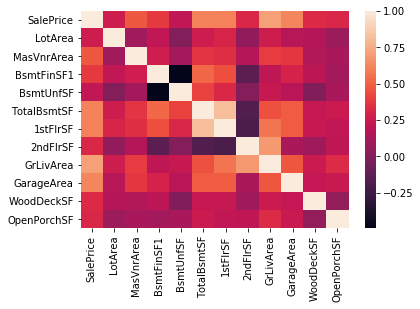

In [8]:
c.correlation_report()

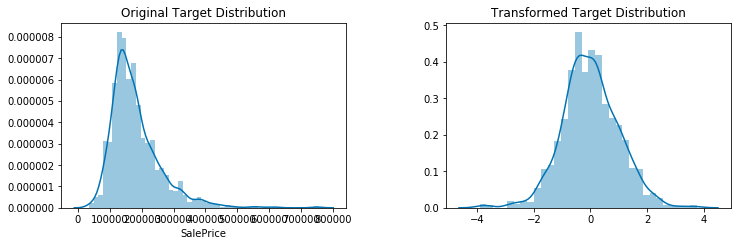

In [9]:
c.target_distribution_report()

In [10]:
#c.categorical_bar_plots()

In [11]:
#c.numeric_boxplot()

In [12]:
#c.probability_plots()

In [13]:
c.baseline_prediction()

SalePrice    0.020507
dtype: float64

In [43]:
c.transformed_regression()

In [16]:
c.transformed_decision_tree()[:10]

array([ 0.90540651, -0.01101838,  0.64118507, -0.12054845,  3.24762858,
       -0.45081323, -0.43085295, -0.1925478 ,  0.84439754,  1.26463737])

In [17]:
c.transformed_random_forest()[:10]

array([ 0.84397444,  0.1296797 ,  0.53465967,  0.14576657,  2.49824107,
        0.3400832 , -1.35454724,  0.01660629,  0.97580395,  1.62564853])

In [18]:
 c.transformed_gradient_booster()[:10]

array([ 0.92406641,  0.17313788,  0.78990901,  0.03984491,  2.67739642,
        0.43534527, -1.9248198 , -0.03997448,  0.976236  ,  1.69800727])

In [28]:
c.train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
487,488,20,RL,70.0,12243,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,175000
1394,1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
1406,1407,85,RL,70.0,8445,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,133000
837,838,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,100000
1111,1112,60,RL,80.0,10480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,205000


In [29]:
c.train_transformed_data.head()

,MSSubClass_target_encoded,MSZoning_target_encoded,LotFrontage_target_encoded,Street_target_encoded,LotShape_target_encoded,LandContour_target_encoded,Utilities_target_encoded,LotConfig_target_encoded,LandSlope_target_encoded,Neighborhood_target_encoded,...,missing_BsmtQual,missing_BsmtCond,missing_BsmtExposure,missing_BsmtFinType1,missing_BsmtFinType2,missing_GarageType,missing_GarageYrBlt,missing_GarageFinish,missing_GarageQual,missing_GarageCond
0,0.093176,0.160734,-0.300125,0.004887,0.366676,-0.007077,0.000435,-0.052459,-0.014265,0.318289,...,0,0,0,0,0,0,0,0,0,0
1,0.418981,0.160734,0.206587,0.004887,-0.226569,-0.007077,0.000435,-0.052459,-0.014265,0.417392,...,0,0,0,0,0,0,0,0,0,0
2,-0.369726,0.160734,-0.300125,0.004887,-0.226569,-0.007077,0.000435,0.011901,-0.014265,0.337507,...,0,0,0,0,0,0,0,0,0,0
3,-0.497252,-0.873943,-1.442395,0.004887,-0.226569,-0.007077,0.000435,-0.052459,-0.014265,-1.231786,...,0,0,0,0,0,0,0,0,0,0
4,0.784677,0.160734,0.104121,0.004887,-0.226569,-0.007077,0.000435,-0.052459,-0.014265,0.318289,...,0,0,0,0,0,0,0,0,0,0


0    985
1    110
dtype: int64